In [2]:
import pandas as pd
import matplotlib.image as mpig
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [5]:
df.dropna(inplace = True)

In [6]:
regions = {
    "Southern California": {
        "lat_min": 32.5, 
        "lat_max": 35.5,
        "lon_min": -120.5, 
        "lon_max": -117.5
    },
    "Imperial & SE Desert": {
        "lat_min": 32.5, 
        "lat_max": 35.5,
        "lon_min": -117.5, 
        "lon_max": -114.0
    },
    "Central Coast": {
        "lat_min": 34.5,
        "lat_max": 36.5,
        "lon_min": -122.0,   
        "lon_max": -120.5
    },
    "Bay Area": {
        "lat_min": 36.5, 
        "lat_max": 38.5, 
        "lon_min": -124.5, 
        "lon_max": -120.5
    },
    "Central Valley": {
        "lat_min": 35.5,
        "lat_max": 38.5,
        "lon_min": -120.5, 
        "lon_max": -115.0
    },
    "Northern California": {
        "lat_min": 38.5, 
        "lat_max": 42.0, 
        "lon_min": -124.5, 
        "lon_max": -119.0
    }
}


In [7]:
california_img = mpig.imread("california.png")

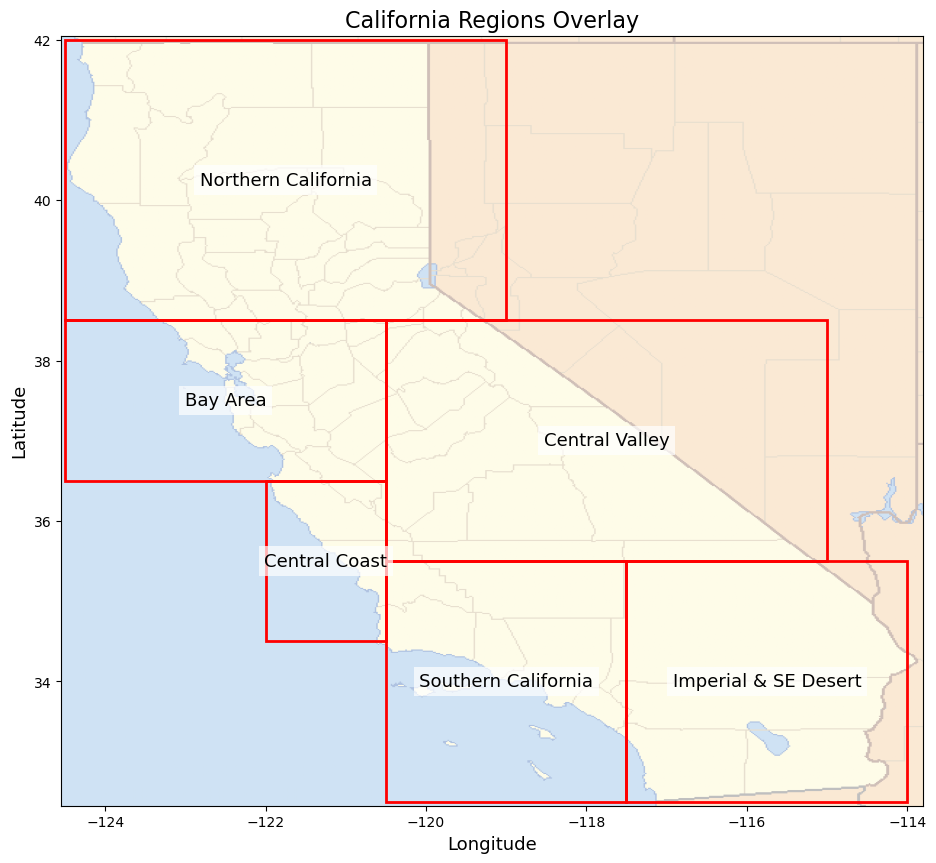

In [8]:
plt.figure(figsize = (12,10))

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

# Regions
for region_name, bounds in regions.items():
    lat_min = bounds["lat_min"]
    lat_max = bounds["lat_max"]
    lon_min = bounds["lon_min"]
    lon_max = bounds["lon_max"]
    
    # Rectangles
    plt.gca().add_patch(
        Rectangle(
            (lon_min, lat_min),  # Bottom-left corner 
            lon_max - lon_min,   # Width
            lat_max - lat_min,   # Height
            linewidth=2,         
            edgecolor='red',    
            facecolor='none'    
        )
    )
    
    # Region Names
    plt.text(
        (lon_min + lon_max) / 2, 
        (lat_min + lat_max) / 2, 
        region_name, 
        color='black', 
        fontsize=13,
        ha='center', 
        va='center', 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

plt.ylabel("Latitude", fontsize=13)
plt.xlabel("Longitude", fontsize=13)
plt.title("California Regions Overlay", fontsize=16)
plt.grid(False)
plt.show()

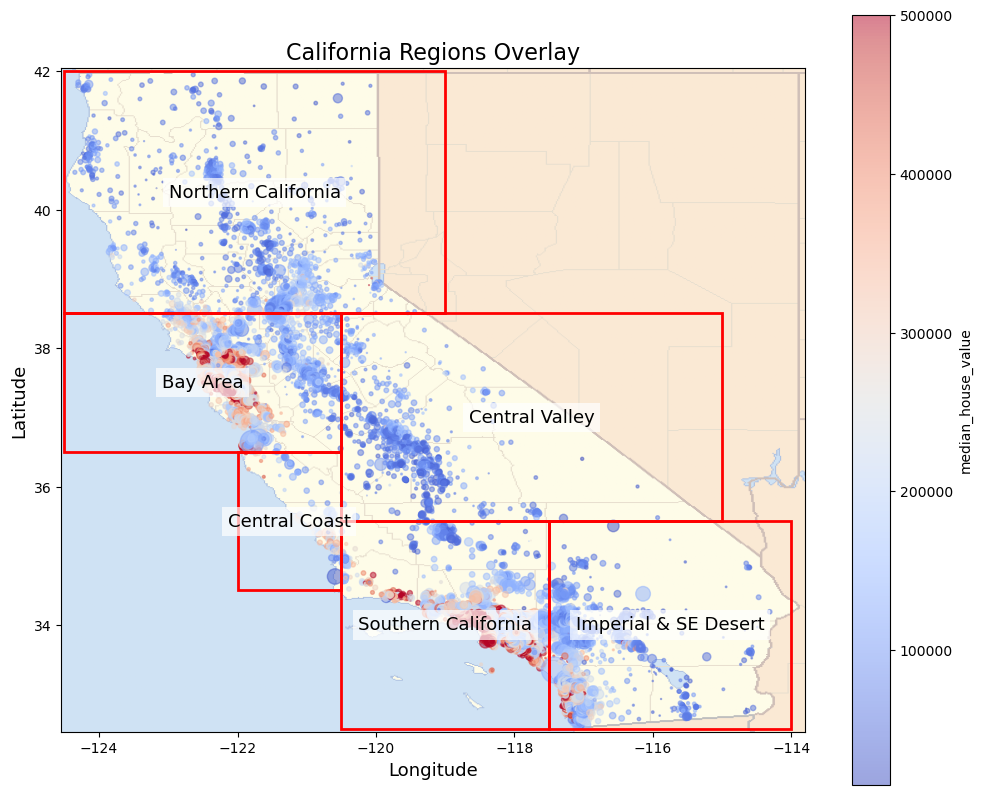

In [9]:
df.plot (kind = "scatter", x = "longitude", y = "latitude", s = df.population/100, c = "median_house_value", cmap = "coolwarm",
        alpha = 0.5, sharex = False, figsize = (12,10))

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

# Regions
for region_name, bounds in regions.items():
    lat_min = bounds["lat_min"]
    lat_max = bounds["lat_max"]
    lon_min = bounds["lon_min"]
    lon_max = bounds["lon_max"]
    
    # Rectangles
    plt.gca().add_patch(
        Rectangle(
            (lon_min, lat_min),  # Bottom-left corner 
            lon_max - lon_min,   # Width
            lat_max - lat_min,   # Height
            linewidth=2,         
            edgecolor='red',    
            facecolor='none'    
        )
    )
    
    # Region Names
    plt.text(
        (lon_min + lon_max) / 2, 
        (lat_min + lat_max) / 2, 
        region_name, 
        color='black', 
        fontsize=13,
        ha='center', 
        va='center', 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

plt.ylabel("Latitude", fontsize=13)
plt.xlabel("Longitude", fontsize=13)
plt.title("California Regions Overlay", fontsize=16)
plt.grid(False)
plt.show()

In [10]:
# Assign the coordinates to the row
def assign_region(lat, lon):
    for region, bounds in regions.items():
        if bounds["lat_min"] <= lat <= bounds["lat_max"] and bounds["lon_min"] <= lon <= bounds["lon_max"]:
            return region
    return "Unknown"

In [11]:
df['region'] = df.apply(lambda row: assign_region(row['latitude'], row['longitude']), axis=1)

In [12]:
df.region.value_counts()

region
Southern California     8654
Bay Area                5634
Imperial & SE Desert    2808
Northern California     2003
Central Valley          1166
Central Coast            168
Name: count, dtype: int64

In [13]:
df["rooms_per_house"] = df.total_rooms.div(df.households)

In [14]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [15]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity               region  rooms_per_house  bedrooms_per_room  
0            NEAR BAY             Bay Area         6.984127           0.146591  
1            NEAR BAY             Bay Area         6.238137           0.155797  
2            NEAR BAY             Bay Area         8.288136           0.129516  
3            NEAR BAY             Bay Area         5.817352           0.184458  
4            NEAR BAY             Bay Area         6.281853           0.172096  
...               ...                  ...              ...                ...  
20635          INLAND  Northern California         5.045455           0.224625  
20636          INLAND  Northern California         6.114035           0.215208  
20637          INLAND  Northern California         5.205543           0.215173  
20638          INLAND  Northern California         5.329513           0.219892  
20639          INLAND  Northern California         5.254717           0.221185  

[20433 rows x 13 columns]

In [16]:
df.drop(columns = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"], inplace = True)

In [17]:
df.to_csv("housing_regions.csv", index = False)